In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Google-Playstore.csv")

<ipython-input-7-4c3fc9d57244>:1: DtypeWarning: Columns (8,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Google-Playstore.csv")


In [ ]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15.0,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662.0,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58.0,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19.0,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478.0,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111083 entries, 0 to 111082
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   App Name           111082 non-null  object 
 1   App Id             111082 non-null  object 
 2   Category           111082 non-null  object 
 3   Rating             110009 non-null  float64
 4   Rating Count       110009 non-null  float64
 5   Installs           111075 non-null  object 
 6   Minimum Installs   111075 non-null  float64
 7   Maximum Installs   111082 non-null  float64
 8   Free               111082 non-null  object 
 9   Price              111082 non-null  float64
 10  Currency           111074 non-null  object 
 11  Size               111077 non-null  object 
 12  Minimum Android    110761 non-null  object 
 13  Developer Id       111081 non-null  object 
 14  Developer Website  74626 non-null   object 
 15  Developer Email    111081 non-null  object 
 16  Re

In [ ]:
df.shape

(111083, 24)

In [ ]:
df1 = df.drop(['App Id','Developer Id','Developer Website','Developer Email','Minimum Installs',
               'Privacy Policy','Scraped Time',],
               axis=1, inplace=False)

In [ ]:
df1.isnull().sum()

App Name               1
Category               1
Rating              1074
Rating Count        1074
Installs               8
Maximum Installs       1
Free                   1
Price                  1
Currency               9
Size                   6
Minimum Android      322
Released            3344
Last Updated           1
Content Rating         1
Ad Supported           1
In App Purchases       1
Editors Choice         1
dtype: int64

In [ ]:
df1.shape

(111083, 17)

In [ ]:
# number of apps in each category
cat_df = pd.DataFrame(df1['Category'].value_counts().head()).reset_index()
cat_df

,index,Category
0,Education,11397
1,Music & Audio,7604
2,Tools,6951
3,Business,6896
4,Entertainment,6522


In [ ]:
# total number of categories
df1['Category'].nunique()

48

In [ ]:
# plot

In [ ]:
# what percentage of apps are free
free_df = df1['Free'].value_counts()
free_df

True     108865
False      2217
Name: Free, dtype: int64

In [ ]:
# plot


In [ ]:
# number of apps in racing category
len(df1[df1['Category'] == 'Racing'])

562

In [ ]:
# time between released date and updation of apps
pd.to_datetime(df1['Last Updated'][2]) - pd.to_datetime(df1['Released'][2])

Timedelta('10 days 00:00:00')

In [ ]:
df2 = df1.copy()
df2.dropna(inplace=True)

In [ ]:
df2.shape

(107412, 17)

In [ ]:
# number of app installations and their categories
df2['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+'], dtype=object)

In [ ]:
df3 = df2['Installs'].value_counts().head(15)
df3

100+           20670
1,000+         18603
10+            13853
10,000+        12098
500+            8762
50+             7762
5,000+          6747
100,000+        5109
50,000+         3542
5+              3376
1+              2980
1,000,000+      1530
500,000+        1230
0+               530
10,000,000+      291
Name: Installs, dtype: int64

In [ ]:
df2[df2['Installs'] == '10,000,000+'][['App Name','Maximum Installs']]


,App Name,Maximum Installs
92,Car Games Revival: Car Racing Games for Kids,30052692.0
561,Web Browser & Fast Explorer,13629503.0
631,Piano Melody,13882293.0
747,Crazy Kick!,31738431.0
764,Bridge Constructor Playground FREE,11050132.0
...,...,...
109175,Roller Coaster Train Simulator,11847165.0
109237,Drum Pads 24 - Music Maker,19730136.0
109415,Super Salon,19703008.0
110157,"Candy selfie -beauty camera, sweet selfie",25894378.0


In [ ]:
df2[df2['Installs'] == '5,000,000+'][['App Name','Maximum Installs']]


,App Name,Maximum Installs
291,Taxsee Driver,6864573.0
728,Glitter Color: Adult Coloring Book By Number P...,8532920.0
914,Love Photo Frame,5111138.0
942,Fabulous - Angela's Wedding Disaster 👰 🤵,6120263.0
948,Gandr — A photo collage maker without limits,7637954.0
...,...,...
108394,Free Funny Videos 2020,6606172.0
109241,Bolt Driver: Drive & Earn,5884604.0
109409,Kaidee แหล่งช้อปซื้อขายออนไลน์,7565957.0
109584,"n-Track Studio DAW Beat Maker, Record Audio, D...",8149485.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107412 entries, 0 to 111081
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   App Name          107412 non-null  object 
 1   Category          107412 non-null  object 
 2   Rating            107412 non-null  float64
 3   Rating Count      107412 non-null  float64
 4   Installs          107412 non-null  object 
 5   Maximum Installs  107412 non-null  float64
 6   Free              107412 non-null  object 
 7   Price             107412 non-null  float64
 8   Currency          107412 non-null  object 
 9   Size              107412 non-null  object 
 10  Minimum Android   107412 non-null  object 
 11  Released          107412 non-null  object 
 12  Last Updated      107412 non-null  object 
 13  Content Rating    107412 non-null  object 
 14  Ad Supported      107412 non-null  object 
 15  In App Purchases  107412 non-null  object 
 16  Editors Choice    10

In [ ]:
df2.head()

,App Name,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,Adventure,0.0,0.0,10+,15.0,True,0.0,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",7662.0,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,Productivity,0.0,0.0,50+,58.0,True,0.0,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,19.0,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,Tools,0.0,0.0,100+,478.0,True,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False


In [ ]:
# How many apps per rating given to apps
df4 = df2.groupby('Rating')['App Name'].count().sort_values(ascending=False).head(10)
df4

Rating
0.0    49797
5.0     4657
4.2     4118
4.4     4089
4.3     3913
4.5     3712
4.6     3652
4.1     3286
4.0     3276
4.7     2965
Name: App Name, dtype: int64

In [ ]:
# Median rating and rating count of each app given per category
df2.groupby('Category')['Rating','Rating Count'].median().sort_values(by='Rating Count', ascending=False).head(10)

<ipython-input-41-c89914b3d5ff>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('Category')['Rating','Rating Count'].median().sort_values(by='Rating Count', ascending=False).head(10)


,Rating,Rating Count
Category,,
Simulation,3.8,133.0
Role Playing,3.9,110.0
Card,3.9,50.5
Casino,4.0,50.0
Weather,3.9,45.5
Racing,3.8,35.0
Video Players & Editors,3.7,34.0
Strategy,3.8,27.0
Word,4.0,18.0


In [ ]:
df2.groupby('Category')['Rating Count'].sum().sort_values(ascending= False).head(10).reset_index()

,Category,Rating Count
0,Action,74121842.0
1,Social,38375027.0
2,Entertainment,18698562.0
3,Puzzle,14375013.0
4,Lifestyle,13008469.0
5,Tools,12023531.0
6,Simulation,11553233.0
7,Adventure,9595017.0
8,Productivity,8027042.0
9,Racing,7777269.0


In [ ]:
# Top 5 size of apps
df5 = df2['Size'].value_counts().head()
df5

11M                   2929
12M                   2577
Varies with device    2364
13M                   2206
14M                   2136
Name: Size, dtype: int64

In [ ]:
# What are the number of apps in content rating?
rating_df = pd.DataFrame(df2['Content Rating'].value_counts()).reset_index()
rating_df['Total Percentage'] = rating_df['Content Rating'].map(lambda x: round((x / rating_df['Content Rating'].sum())*100,2))
rating_df

,index,Content Rating,Total Percentage
0,Everyone,93992,87.51
1,Teen,9126,8.50
2,Mature 17+,2747,2.56
3,Everyone 10+,1532,1.43
4,Unrated,9,0.01
5,Adults only 18+,6,0.01


In [ ]:
# What about Ad supported or not and in app purchase status?
df2['Ad Supported'].value_counts()

True     54718
False    52694
Name: Ad Supported, dtype: int64

In [ ]:
df2['In App Purchases'].value_counts()

False    98303
True      9109
Name: In App Purchases, dtype: int64

<Figure size 1000x600 with 0 Axes>

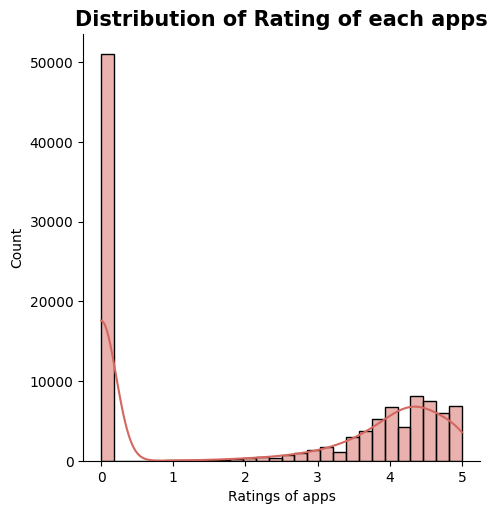

In [ ]:
# PLOTTING - What is the distribution of Rating of app
plt.figure(figsize=(10,6),facecolor='#dbd7d7')
sns.displot(x=df1['Rating'],kde=True, color='#d4675f')
plt.title("Distribution of Rating of each apps", fontsize=15, fontweight='bold')
plt.xlabel("Ratings of apps")
plt.show()

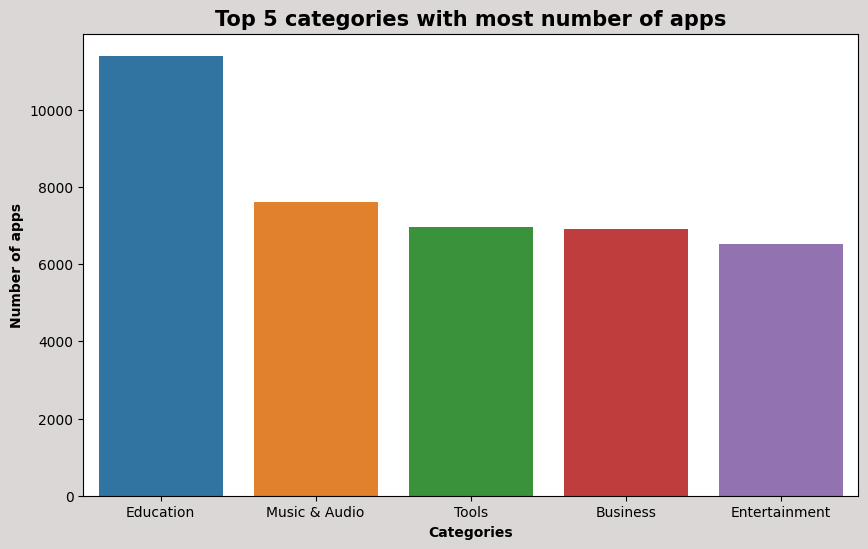

In [ ]:
# PLOTTING - the number of apps are there in each category
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
sns.barplot(x='index', y='Category', data=cat_df)
plt.title("Top 5 categories with most number of apps", fontsize=15, fontweight='bold')
plt.xlabel("Categories", fontweight='bold')
plt.ylabel("Number of apps", fontweight='bold')
plt.show()

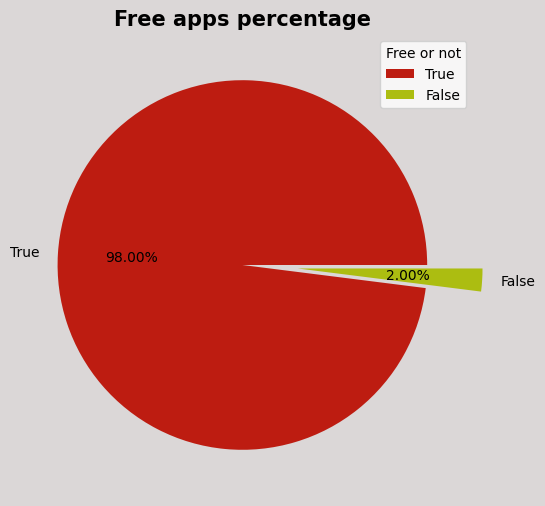

In [ ]:
# pie chart of percentage of free apps
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.pie(free_df.values,
        colors=['#bd1c11','#acbd11'],
        labels=free_df.index,
        autopct = '%1.2f%%',
        explode=[0.0, 0.3])
plt.legend(title='Free or not')
plt.title("Free apps percentage", fontsize=15, fontweight='bold')
plt.show()

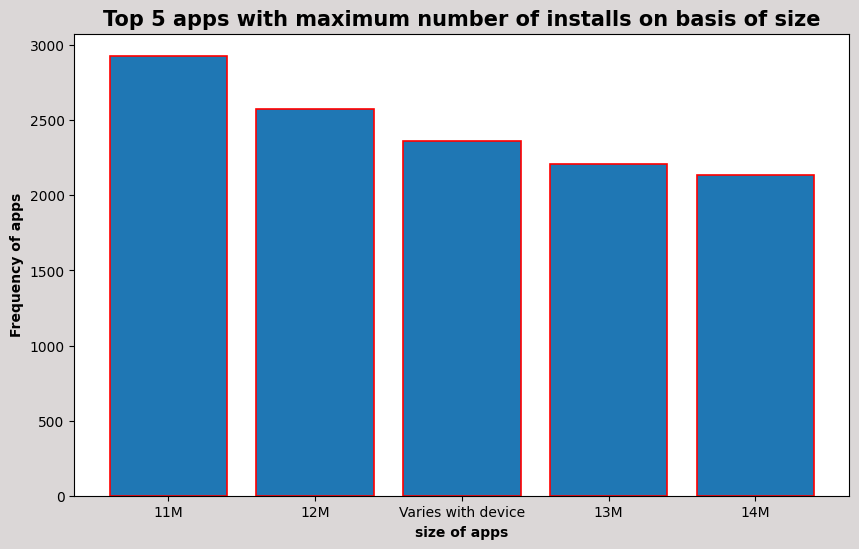

In [ ]:
# PLOTTING - Top 5 size of apps
plt.figure(figsize=(10,6), facecolor='#dbd7d7')
plt.bar(df5.index, df5.values, edgecolor= 'r', linewidth=1.2)
plt.title("Top 5 apps with maximum number of installs on basis of size", fontsize=15, fontweight='bold')
plt.xlabel("size of apps",  fontweight='bold')
plt.ylabel('Frequency of apps', fontweight='bold')
plt.show()